In [1]:
#import dependencies
import pandas as pd
import statistics 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import matplotlib as mpl

In [2]:
# Files to load
city_data_to_load = ("Resources/city_data.csv")
ride_data_to_load = ("Resources/ride_data.csv")

In [3]:
# Read the city data and ride files and store it in a pandas DataFrame.
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Read the ride data and ride files and store it in a pandas DataFrame.
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [6]:
#Get the total rides and total fares for each city type
total_rides = pyber_data_df.groupby("type").count()["ride_id"]
total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_fares = pyber_data_df.groupby("type").sum()["fare"]

In [7]:
# Calculate the average fare per ride and the average fare per driver by city type
average_fare_per_ride = round((total_fares / total_rides),2)
average_fare_per_driver = round((total_fares / total_drivers),2)

In [8]:
#Create the summary DataFrame
summary_df= pd.DataFrame({
            "Total Rides": total_rides,
            "Total Drivers": total_drivers,
            "Total Fares" : total_fares,
            "Average Fare per Ride" : average_fare_per_ride,
            "Average Fare per Driver" : average_fare_per_driver})

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [9]:
#Delete the index name
summary_df.index.name = None
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.62,55.49
Suburban,625,490,19356.33,30.97,39.50
Urban,1625,2405,39854.38,24.53,16.57


In [10]:
# formatting
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [11]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
#rename columns
pyber_data_df.rename(columns={'city': 'City', 
                              'date':'Date',
                              'fare':'Fare', 
                              'ride_id': 'Ride Id',
                              'driver_count': 'No. Drivers', 
                              'type':'City Type'},
                              inplace=True)
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
#Set the index to the Date column.
pyber_data_df.set_index("Date", inplace=True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [14]:
#Create a new DataFrame for fares and include only the Date, City Type, and Fare
fare_df = pyber_data_df.copy()
fare_df.drop(columns=["City", "Ride Id", "No. Drivers"])

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [15]:
#Set the index to the datetime data type
fare_df.index = pd.to_datetime(fare_df.index)
fare_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [16]:
#Check the DataFrame info
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Fare         2375 non-null   float64
 2   Ride Id      2375 non-null   int64  
 3   No. Drivers  2375 non-null   int64  
 4   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 111.3+ KB


In [28]:
#Calculate the sum of fares by the type of city 
total_fare_by_city_type = fare_df.groupby(["City Type", "Date"]).sum()["Fare"]
total_fare_by_city_type_df = pd.DataFrame(total_fare_by_city_type)
total_fare_by_city_type_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:49  18.45
          2019-05-08 07:29:01  18.55
          2019-05-08 11:38:35  19.77
          2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [29]:
#Reset the index
total_fare_by_city_type_df.reset_index(inplace=True)
total_fare_by_city_type_df

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [36]:
# Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row.
total_fare_by_city_type_df.set_index("Date", inplace=True)
total_fare_by_city_type_df.head()

,City Type,Fare
Date,,
2019-01-01 09:45:36,Rural,43.69
2019-01-02 11:18:32,Rural,52.12
2019-01-03 19:51:01,Rural,19.90
2019-01-04 03:31:26,Rural,24.88
2019-01-06 07:38:40,Rural,47.33


In [41]:
pivot_table = pd.pivot_table(total_fare_by_city_type_df, columns="City Type", 
                             index="Date")
pivot_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [42]:
# Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28
jan_march_df = pivot_table.loc['2019-01-01':'2019-04-28']
jan_march_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [51]:
# resample date index into weekly bins
jan_march_total_fare_by_week = jan_march_df.resample('W').sum()
jan_march_total_fare_by_week 

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

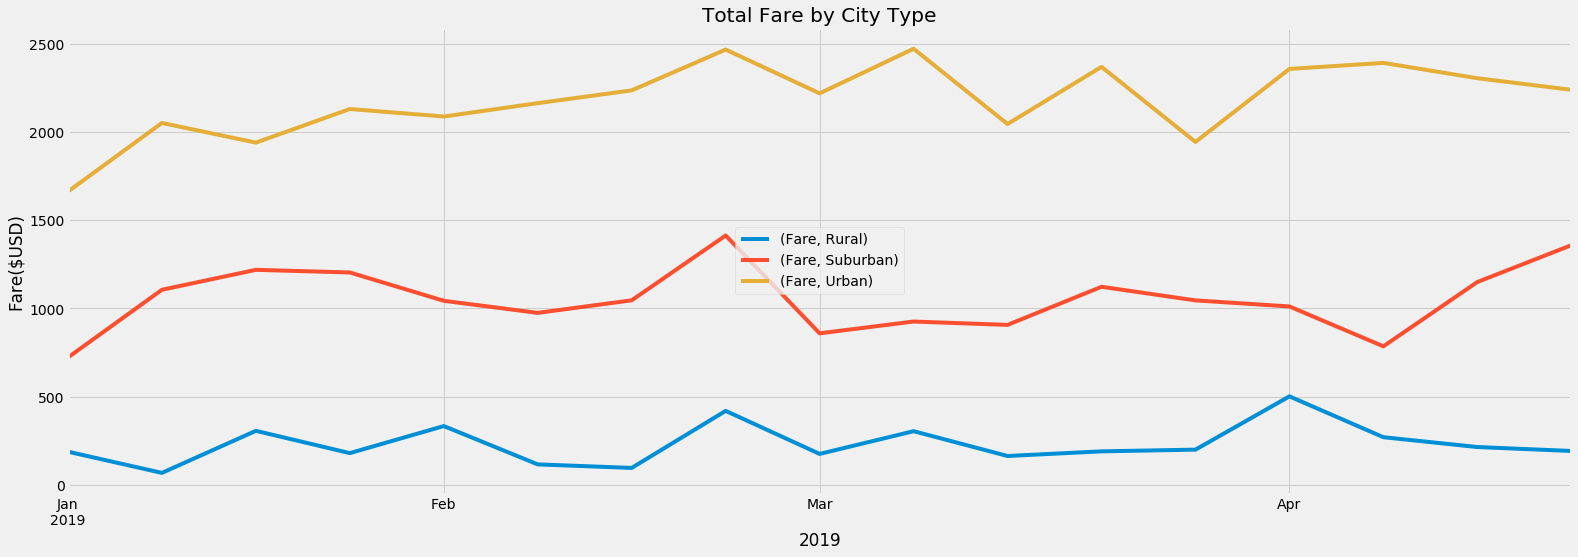

In [58]:
# create a plot
import matplotlib.style as style
style.use('fivethirtyeight')
jan_march_total_fare_by_week .plot(label="City Type", figsize=(24,8))
plt.title("Total Fare by City Type")
plt.xlabel("2019")
plt.ylabel("Fare($USD)")
plt.legend(loc="center")
plt.savefig("analysis/Fig8.png")